## Project Prework- Webscraping list of ikeas stores from wikipedia 

Let's kick off the Blahaj (Ikea Blue Shark) Project. Our starting point involves some web scraping magic from Wikipedia. Why? We're aiming to identify the countries where IKEA stores are up and running. But here's the interesting twist: we're not stopping at just gathering data. Our focus is on comparing the prices of the 100cm Blahaj – that cool Blue Shark plushie – across different countries. 


## 1. Import necessary libraries: 
import requests
from bs4 import BeautifulSoup
import pandas as pd

## 2. Send a GET request to the Wikipedia page:
url = "https://en.wikipedia.org/wiki/List_of_countries_with_IKEA_stores"
response = requests.get(url)
response.raise_for_status()  # Check for request success

## 3. Create a BeautifulSoup object to parse the HTML content:
soup = BeautifulSoup(response.content, "html.parser")

## 4. Find the table with class "wikitable sortable":
table = soup.find("table", class_="wikitable sortable")

## 5. Extract table rows and create a pandas DataFrame:
rows = []
for tr in table.find_all("tr"):
    row = [td.text.strip() for td in tr.find_all(["th", "td"])]
    if row:
        rows.append(row)

df = pd.DataFrame(rows[1:], columns=rows[0])
df.index += 1

<!--

It extracts data from an HTML table on a Wikipedia page, stores it in a list of rows, and then converts that list into a pandas DataFrame. 

rows = []: 
This initializes an empty list called rows that will store the extracted data from the table.

for tr in table.find_all("tr"): 
This loop iterates through each <tr> (table row) element found within the table. It uses table.find_all("tr") to find all rows in the table.

row = [td.text.strip() for td in tr.find_all(["th", "td"])]: 
For each row, this list comprehension extracts the text content of each cell in that row (both <th> and <td> elements). It uses tr.find_all(["th", "td"]) to find all header and data cells within the row. td.text.strip() is used to extract the text content of the cell while removing any leading or trailing whitespace.

if row: 
This checks if the row list is not empty. Some rows in the table might not have any cells due to spanning or other reasons. If the row has at least one cell, it's considered valid and will be added to the rows list.

rows.append(row): 
If the row is not empty, it's added to the rows list. 

df = pd.DataFrame(rows[1:], columns=rows[0]): 
This line creates a DataFrame called df. The rows[1:] slice contains all rows except the first one, which is assumed to be the header row containing column names. columns=rows[0] assigns the values of the first row as the column names of the DataFrame.

df.index += 1: 
This increments the index of the DataFrame by 1. This is done to make the index start from 1 instead of 0, which might be more intuitive when representing data from a table.

-->

## 6. Display the DataFrame and save it to an Excel file:
print(df)
df.to_excel("wiki_ikea1.xlsx", index=False)


Here's the catch: Chile won't be in our analysis since they're all about the smaller 55cm Blahaj. And Macau? It's in cahoots with Hong Kong, so we're giving it a pass. 

With a list of 59 IKEA-ready countries in hand, our next step involves delving into the websites of each country's IKEA outlet to understand their unique HTML structures. Buckle up, because by nailing these steps, the Blahaj Project is on track to reveal the cost of that 100cm Blahaj plushie at IKEA stores worldwide.

## Importing Libraries:

The code begins by importing necessary **libraries**: 

**requests** for making HTTP requests, 
**BeautifulSoup** for web scraping, 
**pandas** for data manipulation, 
**yfinance** for fetching exchange rates, 
**re** for regular expressions, 
**matplotlib.pyplot** for plotting.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import yfinance as yf
import re
import matplotlib.pyplot as plt

## Country URLs and Groups:

This dictionary **country_urls** contains URLs for the IKEA Blue Shark Plush Toy in different countries.

In [2]:
country_urls = {
    'sweden': 'https://www.ikea.com/se/sv/p/blahaj-mjukleksak-haj-30373588/',
    'norway': 'https://www.ikea.com/no/no/p/blahaj-toyleke-hai-30373588/',
    'denmark': 'https://www.ikea.com/dk/da/p/blahaj-tojdyr-haj-30373588/',
    'switzerland': 'https://www.ikea.com/ch/en/p/blahaj-soft-toy-shark-30373588/',
    'japan': 'https://www.ikea.com/jp/ja/p/blahaj-soft-toy-shark-10373589/',
    'germany': 'https://www.ikea.com/de/de/p/blahaj-stoffspielzeug-hai-30373588/',
    'australia': 'https://www.ikea.com/au/en/p/blahaj-soft-toy-shark-10373589/',
    'canada': 'https://www.ikea.com/ca/en/p/blahaj-soft-toy-shark-90373590/',
    'austria': 'https://www.ikea.com/at/de/p/blahaj-stoffspielzeug-hai-30373588/',
    'singapore': 'https://www.ikea.com/sg/en/p/blahaj-soft-toy-shark-10373589/',
    'netherlands': 'https://www.ikea.com/nl/nl/p/blahaj-pluchen-speelgoed-haai-30373588/',
    'spain': 'https://www.ikea.com/es/en/p/blahaj-soft-toy-shark-30373588/',
    'france': 'https://www.ikea.com/fr/fr/p/blahaj-peluche-requin-30373588/',
    'saudi arabia': 'https://www.ikea.com/sa/en/p/blahaj-soft-toy-shark-80556378/',
    'belgium': 'https://www.ikea.com/be/nl/p/blahaj-pluchen-speelgoed-haai-30373588/',
    'kuwait': 'https://www.ikea.com/kw/en/p/blahaj-soft-toy-shark-80556378/',
    'united states': 'https://www.ikea.com/us/en/p/blahaj-soft-toy-shark-90373590/',
    'united kingdom': 'https://www.ikea.com/gb/en/p/blahaj-soft-toy-shark-30373588/',
    'hungary': 'https://www.ikea.com/hu/hu/p/blahaj-puha-jatekfigura-capa-30373588/',
    'poland': 'https://www.ikea.com/pl/pl/p/blahaj-pluszak-rekin-30373588/',
    'czech republic': 'https://www.ikea.com/cz/cs/p/blahaj-plysova-hracka-zralok-30373588/',
    'serbia': 'https://www.ikea.com/rs/sr/p/blahaj-plisana-igracka-ajkula-30373588/',
    'united arab emirates': 'https://www.ikea.com/ae/en/p/blahaj-soft-toy-shark-80556378/',
    'slovakia': 'https://www.ikea.com/sk/sk/p/blahaj-plysova-hracka-zralok-30373588/',
    'finland': 'https://www.ikea.com/fi/fi/p/blahaj-pehmolelu-hai-30373588/',
    'malaysia': 'https://www.ikea.com/my/en/p/blahaj-soft-toy-shark-10373589/',
    'israel': 'https://www.ikea.com/il/he/p/blahaj-soft-toy-shark-30373588/',
    'portugal': 'https://www.ikea.com/pt/pt/p/blahaj-peluche-tubarao-30373588/',
    'romania': 'https://www.ikea.com/ro/ro/p/blahaj-jucarie-de-plus-rechin-30373588/',
    'ireland': 'https://www.ikea.com/ie/en/p/blahaj-soft-toy-shark-30373588/',
    'thailand': 'https://www.ikea.com/th/en/p/blahaj-soft-toy-shark-10373589/',
    'egypt': 'https://www.ikea.com/eg/en/p/blahaj-soft-toy-shark-30373588/',
    'qatar': 'https://www.ikea.com/qa/en/p/blahaj-soft-toy-shark-80556378/',
    'jordan': 'https://www.ikea.com/jo/en/p/blahaj-soft-toy-shark-30373588/',
    'croatia': 'https://www.ikea.com/hr/hr/p/blahaj-plisana-igracka-morski-pas-30373588/',
    'south korea': 'https://www.ikea.com/kr/en/p/blahaj-soft-toy-shark-10373589/',
    'morocco': 'https://www.ikea.com/ma/en/p/blahaj-soft-toy-shark-30373588/',
    'india': 'https://www.ikea.com/in/en/p/blahaj-soft-toy-shark-10373589/',
    'bahrain': 'https://www.ikea.com/bh/en/p/blahaj-soft-toy-shark-80556378/',
    'slovenia': 'https://www.ikea.com/si/sl/p/blahaj-plisasta-igraca-morski-pes-30373588/',
    'philippines': 'https://www.ikea.com/ph/en/p/blahaj-soft-toy-shark-10373589/',
    'oman': 'https://www.ikea.com/om/en/p/blahaj-soft-toy-shark-80556378/',
    'hong kong': 'https://www.ikea.com.hk/zh/products/childrens-toys-play-and-learn/soft-toys/blahaj-art-10373589',
    'iceland': 'https://www.ikea.is/is/products/barna-ikea/leikur/mjukdyr/blahaj-mjukdyr-art-30373588',
    'taiwan': 'https://www.ikea.com.tw/zh/products/childrens-play/comfort-toys/blahaj-art-10373589',
    'dominican republic': 'https://www.ikea.com.do/en/pd/blahaj-soft-toy-art-90373590',
    'puerto rico': 'https://www.ikea.pr/puertorico/en/pd/blahaj-soft-toy-art-90373590',
    'indonesia': 'https://www.ikea.co.id/in/produk/mainan-anak/boneka/blahaj-art-10373589',
    'china': 'https://www.ikea.cn/cn/en/p/blahaj-soft-toy-shark-10373589/',
    'italy': 'https://www.ikea.com/it/it/p/blahaj-giocattolo-morbido-squalo-30373588/',
    'greece': 'https://www.ikea.gr/en/products/baby-children/children-3-7/toys-play-3-7/soft-toys/blahaj-soft-toy/30373588',
    'cyprus': 'https://www.ikea.com.cy/en/products/baby-children/children-3-7/toys-play-3-7/soft-toys/blahaj-soft-toy/30373588',
    'bulgaria': 'https://www.ikea.bg/products/baby-children/children-3-7/toys-play/soft-toys/blahaj-plyushena-igrachka-akula/30373588',
    'turkey': 'https://www.ikea.com.tr/en/product/blahaj-blue-white-soft-toy-30373588',
    'mexico': 'https://www.ikea.com/mx/en/p/blahaj-soft-toy-shark-90373590/',
    'estonia': 'https://www.ikea.ee/en/products/children-s-room/children-3-7/comfort-toys/blahaj-soft-toy-art-30373588',
    'latvia': 'https://www.ikea.lv/en/products/children-s-room/children-s-play/comfort-toys/blahaj-soft-toy-art-30373588',
    'lithuania':'https://www.ikea.lt/en/products/children-s-room/children-s-play/comfort-toys/blahaj-soft-toy-art-30373588',
}

The **country_groups** dictionary is used to group countries into different lists based on their similar HTML structures on the Ikea website. This grouping allows for more efficient web scraping since countries within the same group have the same HTML structure, making it easier to extract the required data.

In [3]:
country_groups= {
'country_groups_1' : ['mexico', 'sweden', 'norway', 'denmark', 'switzerland', 'japan', 'germany', 'australia', 'canada', 'austria', 'singapore', 'netherlands', 'spain', 'france','saudi arabia', 'belgium', 'kuwait', 'united states', 'united kingdom', 'hungary','poland', 'czech republic', 'serbia',  'united arab emirates',  'slovakia' , 'finland','malaysia', 'israel','portugal', 'romania', 'ireland', 'thailand', 'egypt','qatar','jordan', 'croatia', 'south korea', 'morocco', 'india', 'bahrain','slovenia', 'philippines', 'oman'],
'country_groups_2' : ['lithuania','latvia', 'estonia', 'hong kong', 'iceland', 'taiwan', 'dominican republic', 'puerto rico', 'indonesia'],
'country_groups_3' : ['china'],
'country_groups_4' : ['italy'],
'country_groups_5' : ['greece', 'cyprus', 'bulgaria'],
'country_groups_6' : ['turkey']
}

In [4]:
## Local Currency:

The **local_currency** dictionary provides the local currency code for each country. This information is essential when converting the local prices of the Blue Shark Plush Toy to USD using the yfinance library. The dictionary maps each country to its respective local currency code.

In [5]:
local_currency = {
    'sweden': 'SEK',
    'norway': 'NOK',
    'denmark': 'DKK',
    'switzerland': 'CHF',
    'japan': 'JPY',
    'germany': 'EUR',
    'australia': 'AUD',
    'canada': 'CAD',
    'austria': 'EUR',
    'singapore': 'SGD',
    'netherlands': 'EUR',
    'spain': 'EUR',
    'france': 'EUR',
    'saudi arabia': 'SAR',
    'belgium': 'EUR',
    'kuwait': 'KWD',
    'united states': 'USD',
    'united kingdom': 'GBP',
    'hungary': 'HUF',
    'poland': 'PLN',
    'czech republic': 'CZK',
    'serbia': 'RSD',
    'united arab emirates': 'AED',
    'slovakia': 'EUR',
    'finland': 'EUR',
    'malaysia': 'MYR',
    'israel': 'ILS',
    'portugal': 'EUR',
    'romania': 'RON',
    'ireland': 'EUR',
    'thailand': 'THB',
    'egypt': 'EGP',
    'qatar': 'QAR',
    'jordan': 'JOD',
    'croatia': 'EUR',
    'south korea': 'KRW',
    'morocco': 'MAD',
    'india': 'INR',
    'bahrain': 'BHD',
    'slovenia': 'EUR',
    'philippines':'PHP',
    'oman': 'OMR',
    'hong kong': 'HKD',
    'iceland': 'ISK',
    'taiwan': 'TWD',
    'dominican republic': 'DOP',
    'puerto rico': 'USD',
    'indonesia': 'IDR',
    'china': 'CNY',
    'italy': 'EUR',
    'greece': 'EUR',
    'cyprus': 'EUR',
    'bulgaria': 'EUR',
    'turkey': 'TRY',
    'lithuania': 'EUR',
    'latvia': 'EUR',
    'estonia': 'EUR',
    'mexico': 'MXN'
}

## Define customized functions

This function **convert_to_usd** takes local_price (the price in the local currency) and exchange_rate, and returns the price converted to USD using the given exchange rate.

In [6]:
def convert_to_usd(local_price, exchange_rate):
    local_price = float(local_price)
    exchange_rate = float(exchange_rate)
    usd_price = local_price * exchange_rate
    return usd_price

This is a Python function named **convert_to_usd**, which takes two arguments: **local_price** and **exchange_rate**.

**local_price = float(local_price)**: 
This line converts the local_price variable (which is in string format) to a floating-point number. This is done to ensure that mathematical operations can be performed on the value.

The **local_price** is obtained from the HTML content of the website. In HTML, the price might be represented as a string, and it could contain non-numeric characters (e.g., currency symbols, commas, or other special characters).Any non-numeric characters will be ignored during the conversion.

**exchange_rate** = float(exchange_rate): 
Similar to the previous line, this converts the exchange_rate to a floating-point number for the same reason.

**usd_price = local_price * exchange_rate**: 
This line calculates the usd_price by multiplying the local_price with the exchange_rate.

**return usd_price**: 
The function returns the calculated usd_price value as the result of the function call.


This function **fetch_exchange_rate_yahoo** fetches the exchange rate between two currencies using Yahoo Finance API.

In [7]:
def fetch_exchange_rate_yahoo(from_currency, to_currency):
    currency_pair = f"{from_currency}{to_currency}=X"
    data = yf.download(currency_pair, period="1d", progress=False)
    exchange_rate = data["Close"].iloc[-1]
    return exchange_rate
  

This is another Python function named **fetch_exchange_rate_yahoo**, which takes two arguments: **from_currency** and **to_currency**.

**currency_pair = f"{from_currency}{to_currency}=X"**: 
This line creates a currency pair string in the format "from_currencyto_currency=X", which is used to fetch the exchange rate. 
For example, if from_currency is "EUR" and to_currency is "USD", then currency_pair will be "EURUSD=X".

**data = yf.download(currency_pair, period="1d", progress=False)**: 
This line uses the yfinance library to fetch the historical exchange rate data for the specified currency pair. It fetches data for a one-day period (the most recent exchange rate) and stores it in the data variable.

**exchange_rate = data["Close"].iloc[-1]**: 
This line extracts the most recent exchange rate from the downloaded data. The "Close" column represents the closing price, and iloc[-1] selects the last row (most recent) in the data, which corresponds to the latest exchange rate.

**return exchange_rate**: 
The function returns the fetched exchange_rate as the result of the function call.

**to_currency = "USD"**: 
This line sets the target currency to USD, which will be used when calling the fetch_exchange_rate_yahoo function.


## The main part of the code is responsible for web scraping, data extraction, currency conversion, and DataFrame manipulation, resulting in a final DataFrame df with the required data for further analysis and visualization.

In [8]:
to_currency = "USD"

data = []
columns = ['Country', 'Local Price', 'Price']
df = pd.DataFrame(data, columns=columns)


for group, countries in country_groups.items():
    for country in countries:
        url = country_urls.get(country)
        if url:
            response = requests.get(url)
            soup = BeautifulSoup(response.content, "html.parser")
            
            # Extract the price based on the group and country
            if group == 'country_groups_1':
                price_element = soup.find("div", attrs={"class": "pip-product__subgrid"})
                if price_element:
                    local_price = price_element.get("data-product-price")
                
                # Convert the price to USD using the local currency
                from_currency = local_currency[country]
                exchange_rate = fetch_exchange_rate_yahoo(from_currency, to_currency) 
                usd_price = convert_to_usd(local_price, exchange_rate)
                
                # Create a temporary DataFrame with the data to be appended
                temp_df = pd.DataFrame({'Country': [country], 'Local Price':[local_price],'Price': [usd_price]})
                # Concatenate the temporary DataFrame with the existing DataFrame
                df = pd.concat([df, temp_df], ignore_index=True)
                
                
            elif group == 'country_groups_2':
                meta_tag = soup.find("meta", attrs={"property": "product:price:amount"})
                if meta_tag:
                    local_price = meta_tag.get("content")
                
                # Convert the price to USD using the local currency
                from_currency = local_currency[country]
                exchange_rate = fetch_exchange_rate_yahoo(from_currency, to_currency)
                usd_price = convert_to_usd(local_price, exchange_rate)
                
                # Create a temporary DataFrame with the data to be appended
                temp_df = pd.DataFrame({'Country': [country], 'Local Price':[local_price],'Price': [usd_price]})

                # Concatenate the temporary DataFrame with the existing DataFrame
                df = pd.concat([df, temp_df], ignore_index=True)
                
            elif group == 'country_groups_3':
                price_element = soup.find('strong', class_='amount-summary__price')
                if price_element is not None:
                    price = price_element.text.strip()
                    local_price = re.sub(r'[^\d.]', '', price)  # Remove non-numeric characters
   
                # Convert the price to USD using the local currency
                from_currency = local_currency[country]
                exchange_rate = fetch_exchange_rate_yahoo(from_currency, to_currency)
                usd_price = convert_to_usd(local_price, exchange_rate)
                
                # Create a temporary DataFrame with the data to be appended
                temp_df = pd.DataFrame({'Country': [country], 'Local Price':[local_price],'Price': [usd_price]})

                # Concatenate the temporary DataFrame with the existing DataFrame
                df = pd.concat([df, temp_df], ignore_index=True)

            elif group == 'country_groups_4':
                price_element = soup.find("div", class_="js-financial-service pip-financial-service")
                if price_element:
                    local_price = price_element.get("data-price")
                
                # Convert the price to USD using the local currency
                from_currency = local_currency[country]
                exchange_rate = fetch_exchange_rate_yahoo(from_currency, to_currency)
                usd_price = convert_to_usd(local_price, exchange_rate)
                
               # Create a temporary DataFrame with the data to be appended
                temp_df = pd.DataFrame({'Country': [country], 'Local Price':[local_price],'Price': [usd_price]})

                # Concatenate the temporary DataFrame with the existing DataFrame
                df = pd.concat([df, temp_df], ignore_index=True)
                
            elif group == 'country_groups_5':
                price_element = soup.find("div", attrs={"class": "yotpo yotpo-main-widget"})
                if price_element:
                    local_price = price_element.get("data-price")
                
                # Convert the price to USD using the local currency
                from_currency = local_currency[country]
                exchange_rate = fetch_exchange_rate_yahoo(from_currency, to_currency)
                usd_price = convert_to_usd(local_price, exchange_rate)
                
                # Create a temporary DataFrame with the data to be appended
                temp_df = pd.DataFrame({'Country': [country], 'Local Price':[local_price],'Price': [usd_price]})

                # Concatenate the temporary DataFrame with the existing DataFrame
                df = pd.concat([df, temp_df], ignore_index=True)
                
            elif group == 'country_groups_6':
                meta_tag = soup.find("meta", attrs={"property": "og:price:amount"})
                if meta_tag:
                    local_price = meta_tag.get("content")

                # Convert the price to USD using the local currency
                from_currency = local_currency[country]
                exchange_rate = fetch_exchange_rate_yahoo(from_currency, to_currency)
                usd_price = convert_to_usd(local_price, exchange_rate)
                
                # Create a temporary DataFrame with the data to be appended
                temp_df = pd.DataFrame({'Country': [country], 'Local Price':[local_price],'Price': [usd_price]})

                # Concatenate the temporary DataFrame with the existing DataFrame
                df = pd.concat([df, temp_df], ignore_index=True)



**to_currency = "USD"**:
This line assigns the string value "USD" to the variable to_currency.
The variable to_currency will be used as the target currency when converting the local prices to USD.

## Dataframe Initialization:

**data = []**: 
An empty list is assigned to the variable data.

**columns = ['Country', 'Price']**: 
A list containing column names 'Country' and 'Price' is assigned to the variable columns.

**df = pd.DataFrame(data, columns=columns)**: 
This line creates an empty DataFrame df with the specified columns 'Country' and 'Price'.

## Loop through Country Groups and Countries:
The code iterates through each group in the country_groups dictionary and the countries within each group using a nested loop.
Web Scraping and Data Collection:

**url = country_urls.get(country)**: 
This line fetches the URL corresponding to the current country from the country_urls dictionary.

**response = requests.get(url)**: 
The code sends an HTTP GET request to the URL and stores the response in the variable response.

**soup = BeautifulSoup(response.content, "html.parser")**: 
The HTML content of the response is parsed using BeautifulSoup, and the resulting object is stored in soup.

## Outer Loop (for group, countries in country_groups.items():):
The code uses a nested loop structure to iterate through the country_groups dictionary. 
The **items() method** returns a list of tuples where each tuple contains a key-value pair from the dictionary.

In this loop, group represents the key (e.g., 'country_groups_1', 'country_groups_2', etc.), and countries represents the value (a list of countries) associated with each key.

The outer loop iterates through each key-value pair in the country_groups dictionary, allowing the code to access the group name and the list of countries in that group.

## Inner Loop (for country in countries:):
Inside the outer loop, there is an inner loop that iterates through each country in the countries list for the current group.

The inner loop allows the code to process each country one by one, performing the same set of operations for all countries within the same group.
URL Retrieval (url = country_urls.get(country)):

For each country, the code fetches the corresponding URL from the country_urls dictionary using the **get() method**.

The URL is fetched based on the **country name (key) from the country_urls dictionary**, and it will be used to send an HTTP request and scrape data from the Ikea website.

## HTTP Request and BeautifulSoup:
If the url is not None (i.e., a valid URL is retrieved), the code proceeds to send an HTTP GET request to the URL using requests.get(url).
The response content is then parsed using BeautifulSoup with the "html.parser" to create a BeautifulSoup object named soup.
BeautifulSoup is a Python library used for web scraping and parsing HTML content, and it allows easy navigation and extraction of data from the parsed HTML.
Price Extraction (if group == 'country_groups_1': ...):

Inside the inner loop, the code checks the group variable to determine which group the current country belongs to (e.g., 'country_groups_1', 'country_groups_2', etc.).
For each group, the code uses different methods to extract the price of the Blue Shark Plush Toy from the HTML content (stored in the soup object).
In this specific example, for group == 'country_groups_1', the price is extracted using soup.find() method to find a specific <div> element with the class attribute "pip-product__subgrid".
If the price_element is found (i.e., not None), the local price is extracted using the get() method with the attribute "data-product-price". The extracted local_price will be further used for currency conversion and analysis.

## Extracting Price for Each Country:
The code uses different methods to extract the price of the Blue Shark Plush Toy from the HTML content based on the group to which the country belongs.
Conversion and DataFrame Update:

**local_price**, 
which contains the extracted price from the HTML, is used to calculate the equivalent price in USD.

**from_currency = local_currency[country]**: 
The local currency code of the current country is fetched from the local_currency dictionary.

**exchange_rate = fetch_exchange_rate_yahoo(from_currency, to_currency)**: 
The exchange rate between the local currency and USD is fetched using the fetch_exchange_rate_yahoo function.

**usd_price = convert_to_usd(local_price, exchange_rate)**: 
The convert_to_usd function is used to convert the local_price to USD using the fetched exchange_rate.

**temp_df = pd.DataFrame({'Country': [country], 'Local Price':[local_price], 'Price': [usd_price]})**: 
A temporary DataFrame temp_df is created with the data to be appended. 
It contains three columns: 'Country' (the current country), 'Local Price' (the current local price)and 'Price' (the calculated USD price).

**df = pd.concat([df, temp_df], ignore_index=True)**: 
The temporary DataFrame temp_df is concatenated with the main DataFrame df. 
This step adds the USD price for the current country to the main DataFrame.

The code repeats this process for all the countries in each group, adding the calculated USD prices to the main DataFrame df. By the end of the loop, df will contain the USD prices for the Blue Shark Plush Toy from each country in a structured format with columns 'Country' and 'Price'.

In [9]:
## DataFrame Manipulation

In [10]:
df['Country'] = df['Country'].str.capitalize()

In [11]:
df

,Country,Local Price,Price
0,Mexico,599,33.931506
1,Sweden,299,27.094401
2,Norway,349,32.141874
3,Denmark,179,25.170781
4,Switzerland,29.95,32.528537
5,Japan,1999,13.343391
6,Germany,27.99,29.364247
7,Australia,39,24.678860
8,Canada,39.99,29.204275
9,Austria,27.99,29.364247


In [12]:
df_sorted = df.sort_values('Price', ascending=False)

In [13]:
df_sorted

,Country,Local Price,Price
56,Bulgaria,39.90,41.859001
32,Egypt,1199,38.865476
37,Morocco,399,38.722449
0,Mexico,599,33.931506
4,Switzerland,29.95,32.528537
2,Norway,349,32.141874
40,Slovenia,29.99,31.465742
25,Finland,29.99,31.455843
49,Dominican republic,1750,30.891439
50,Puerto rico,30,30.000000


In [14]:
df_sorted['Shark Index'] = df_sorted['Price'] / df_sorted.loc[df['Country'] == 'United states', 'Price'].values[0]

In [15]:
df_sorted

,Country,Local Price,Price,Shark Index
56,Bulgaria,39.90,41.859001,1.395765
32,Egypt,1199,38.865476,1.295948
37,Morocco,399,38.722449,1.291179
0,Mexico,599,33.931506,1.131427
4,Switzerland,29.95,32.528537,1.084646
2,Norway,349,32.141874,1.071753
40,Slovenia,29.99,31.465742,1.049208
25,Finland,29.99,31.455843,1.048878
49,Dominican republic,1750,30.891439,1.030058
50,Puerto rico,30,30.000000,1.000333


**df:** 
This is a pandas DataFrame that was initialized previously with empty data and columns 'Country' and 'Price'.

**df_sorted['Shark Index'] = df_sorted['Price'] / df_sorted.loc[df['Country'] == 'united states', 'Price'].values[0]**

It calculates the "Shark Index" for each country based on the price of the 100cm Blahaj plush toy (referred to as 'Price') in comparison to the price of the same plush toy in the United States.

**df_sorted['Shark Index']:** 
This part of the code indicates that a new column named 'Shark Index' is being added to the DataFrame df_sorted.

**df_sorted['Price']:** 
This is referring to the existing 'Price' column in the DataFrame, which contains the prices of the Blahaj plush toy in different countries.

**df_sorted.loc[df['Country'] == 'united states', 'Price'].values[0]:**
This part retrieves the price of the Blahaj plush toy in the United States. 

df['Country'] == 'united states' is a condition that filters the rows in the DataFrame where the 'Country' column matches 'united states'. This gives a boolean Series of True and False values.

**df_sorted.loc[df['Country'] == 'united states',**

uses the boolean Series to index the df_sorted DataFrame, retrieving the rows where the condition is True.

**['Price']** 
selects the 'Price' column of the filtered rows.

**.values[0]** 
retrieves the value of the first (and only) element of the 'Price' column for the United States. This value is extracted as a numeric value.

**df_sorted:**
The DataFrame df_sorted now contains the original 'Country' and 'Price' columns along with the newly calculated 'Shark Index' column.

In [16]:
## Data Visualization - IKEA Shark Price Different Countries (Sorted)

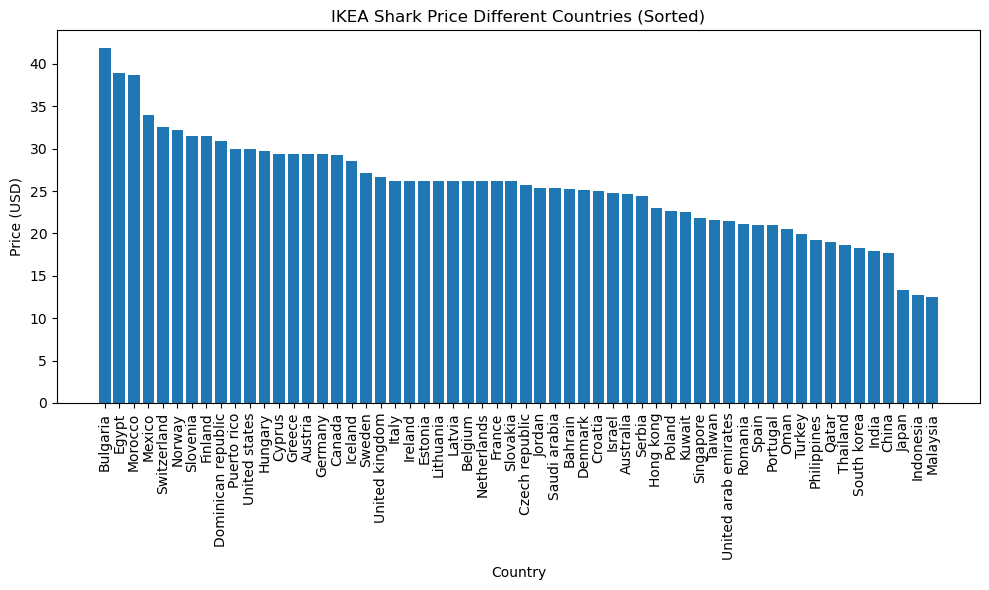

In [17]:
plt.figure(figsize=(10, 6))
plt.bar(df_sorted['Country'], df_sorted['Price'])
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Price (USD)')
plt.title('IKEA Shark Price Different Countries (Sorted)')
plt.tight_layout()
plt.show()

This code block uses Matplotlib, a popular plotting library, to create a bar chart. It visualizes the prices (in USD) of the Blue Shark Plush Toy in different countries.

**plt.figure(figsize=(10, 6)):**
This sets the figure size for the plot.

**plt.bar(df_sorted['Country'], df_sorted['Price']):** 
This creates a bar chart with 'Country' on the x-axis and 'Price' (USD) on the y-axis, using the data from the df_sorted DataFrame.

**plt.xticks(rotation=90):** 
This rotates the x-axis labels by 90 degrees for better readability.

**plt.xlabel('Country') and plt.ylabel('Price (USD)'):** 
These set the x-axis and y-axis labels, respectively.

**plt.title('IKEA Shark Price Different Countries (Sorted)'):** 
This sets the title of the plot.

**plt.tight_layout():** 
This ensures that all plot elements fit nicely within the figure.

**plt.show():** 
This displays the plot on the screen.

## Data Visualization - IKEA Shark Index - Price Index in Different Countries

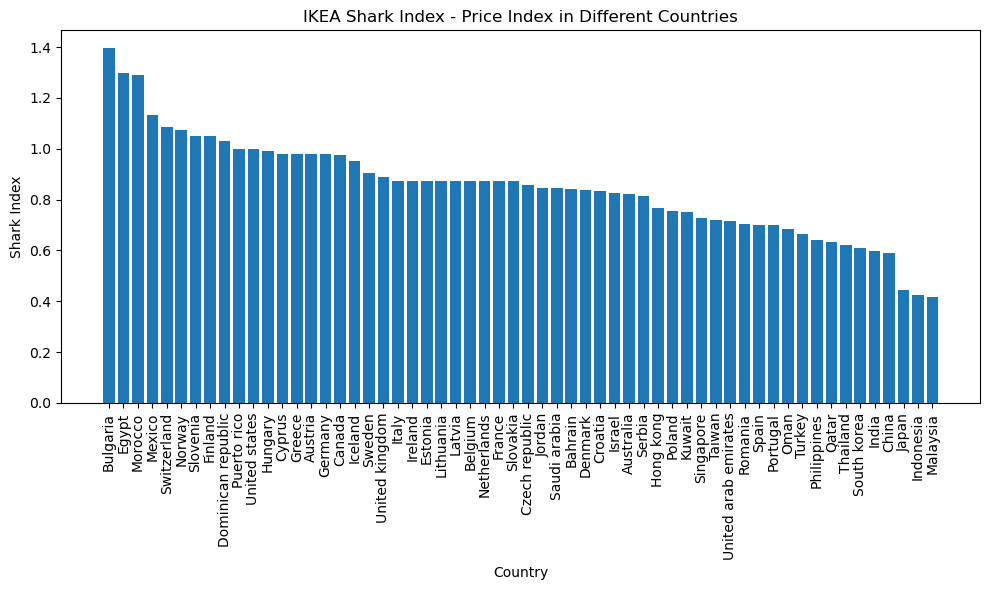

In [18]:
plt.figure(figsize=(10, 6))
plt.bar(df_sorted['Country'], df_sorted['Shark Index'])
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Shark Index')
plt.title('IKEA Shark Index - Price Index in Different Countries')
plt.tight_layout()
plt.show()

This code block is similar to the previous one but creates a bar chart for the 'Shark Index' instead of the 'Price'.

The 'Shark Index' represents the price index of the Blue Shark Plush Toy in different countries relative to the price in the United States.
All the steps in this code block are the same as in the previous one, except for the y-axis label, title, and the data used for the 'y' parameter in plt.bar().

## Refine Data Visualization by sorting the highest price of Blahaj in USD

In [19]:
df_test = df.sort_values('Price', ascending=False)
df_test

,Country,Local Price,Price
56,Bulgaria,39.90,41.859001
32,Egypt,1199,38.865476
37,Morocco,399,38.722449
0,Mexico,599,33.931506
4,Switzerland,29.95,32.528537
2,Norway,349,32.141874
40,Slovenia,29.99,31.465742
25,Finland,29.99,31.455843
49,Dominican republic,1750,30.891439
50,Puerto rico,30,30.000000


This code block creates a new DataFrame df_test by sorting the original df DataFrame based on the 'Price' column in descending order (highest to lowest).

In [20]:
df_test.to_csv('ikea_shark_sorted_prices1.csv', index=False)

This saves the sorted DataFrame df_test to a CSV file named 'ikea_shark_sorted_prices1.csv' without including the index column in the CSV file.

## The percentage difference in price of the 100cm Blahaj plush toy between each country and the United States.

In [21]:
# Calculate percentage
df['Percentage'] = ((df['Price'] - df.loc[df['Country'] == 'United states', 'Price'].item()) / df.loc[df['Country'] == 'United states', 'Price'].item()) * 100

# Print the DataFrame
print(df)


                 Country Local Price      Price  Percentage
0                 Mexico         599  33.931506   13.142733
1                 Sweden         299  27.094401   -9.655215
2                 Norway         349  32.141874    7.175304
3                Denmark         179  25.170781  -16.069418
4            Switzerland       29.95  32.528537    8.464613
5                  Japan        1999  13.343391  -55.507200
6                Germany       27.99  29.364247   -2.086540
7              Australia          39  24.678860  -17.709703
8                 Canada       39.99  29.204275   -2.619955
9                Austria       27.99  29.364247   -2.086540
10             Singapore        29.9  21.781095  -27.372140
11           Netherlands       24.99  26.216953  -12.581016
12                 Spain       19.99  20.971465  -30.071809
13                France       24.99  26.216953  -12.581016
14          Saudi arabia          95  25.343470  -15.493596
15               Belgium       24.99  26

In [22]:
df_test1 = df.sort_values('Price', ascending = False )

Sorting the DataFrame df based on the 'Price' column in descending order and then saving the sorted DataFrame to a CSV file 

## Mapping countries to continents based on a predefined dictionary and adding a 'Continent' column to the DataFrame df_test1

After all steps taken, I found out it would be nice to divide all countries into different continents for further analysis. 


*country_to_continent_mapping dictionary*: Map lowercase country names to continents. 

*str.lower() method*: To convert the country names in the 'Country' column to lowercase before mapping them to continents. This ensures that the mapping is not case-sensitive.

*.map() method*: Adding 'Continent' Column: Add the 'Continent' column to the df_test1 DataFrame using the .map() method, which maps the lowercase country names to continents based on the country_to_continent_mapping dictionary.

In [23]:
country_to_continent_mapping = {
    'sweden': 'Europe',
    'norway': 'Europe',
    'denmark': 'Europe',
    'switzerland': 'Europe',
    'japan': 'Asia Pacific',
    'germany': 'Europe',
    'australia': 'Asia Pacific',
    'canada': 'North America',
    'austria': 'Europe',
    'singapore': 'Asia Pacific',
    'netherlands': 'Europe',
    'spain': 'Europe',
    'france': 'Europe',
    'saudi arabia': 'Middle East',
    'belgium': 'Europe',
    'kuwait': 'Middle East',
    'united states': 'North America',
    'united kingdom': 'Europe',
    'hungary': 'Europe',
    'poland': 'Europe',
    'czech republic': 'Europe',
    'serbia': 'Europe',
    'united arab emirates': 'Middle East',
    'slovakia': 'Europe',
    'finland': 'Europe',
    'malaysia': 'Asia Pacific',
    'israel': 'Middle East',
    'portugal': 'Europe',
    'romania': 'Europe',
    'ireland': 'Europe',
    'thailand': 'Asia Pacific',
    'egypt': 'Middle East',
    'qatar': 'Middle East',
    'jordan': 'Middle East',
    'croatia': 'Europe',
    'south korea': 'Asia Pacific',
    'morocco': 'Africa',
    'india': 'Asia',
    'bahrain': 'Middle East',
    'slovenia': 'Europe',
    'philippines': 'Asia Pacific',
    'oman': 'Middle East',
    'hong kong': 'Asia Pacific',
    'iceland': 'Europe',
    'taiwan': 'Asia Pacific',
    'dominican republic': 'North America',
    'puerto rico': 'North America',
    'indonesia': 'Asia Pacific',
    'china': 'Asia Pacific',
    'italy': 'Europe',
    'greece': 'Europe',
    'cyprus': 'Europe',
    'bulgaria': 'Europe',
    'turkey': 'Middle East',
    'lithuania': 'Europe',
    'latvia': 'Europe',
    'estonia': 'Europe',
    'mexico': 'North America'
}


In [24]:
df_test1['Continent'] = df_test1['Country'].str.lower().map(country_to_continent_mapping)
df_test1

,Country,Local Price,Price,Percentage,Continent
56,Bulgaria,39.90,41.859001,39.576530,Europe
32,Egypt,1199,38.865476,29.594786,Middle East
37,Morocco,399,38.722449,29.117870,Africa
0,Mexico,599,33.931506,13.142733,North America
4,Switzerland,29.95,32.528537,8.464613,Europe
2,Norway,349,32.141874,7.175304,Europe
40,Slovenia,29.99,31.465742,4.920781,Europe
25,Finland,29.99,31.455843,4.887772,Europe
49,Dominican republic,1750,30.891439,3.005798,North America
50,Puerto rico,30,30.000000,0.033344,North America
